# **LAB 4: THỰC HÀNH CHUẨN BỊ DỮ LIỆU**

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Phần 1: Data cleansing & Feature engineering

1. Viết hàm load_data() để tải dữ liệu lên ứng dụng. Sau đó, hiển thị ra màn hình 10 dòng đầu tiên.


In [116]:
def load_data(filepath):
    # Tải dữ liệu từ file CSV
    data = pd.read_csv(filepath) #Đọc data từ filepath
    return data

In [117]:
# Hiển thị 10 dòng đầu tiên
df = load_data('titanic_disaster.csv') #Gọi hàm load_data với dữ liệu là file titanic_disaster.csv
df.head(10) # Hiển thị 10 dòng đầu tiên

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


2. Thống kê dữ liệu thiếu trên các biến số và trực quan hóa dữ liệu thiếu bằng biểu đồ (Heat map). Hãy cho nhận xét về tình trạng thiếu dữ liệu Age, Cabin và Embarked

In [118]:
# Tính tổng số giá trị thiếu (NaN) trên mỗi cột
df_missing = df.isnull().sum()
    # isnull() trả về một dataframe boolean với True ở các vị trí có giá trị thiếu.
    # sum(): tổng các giá trị True trong từng cột
print("\nThống kê dữ liệu thiếu trên các biến số:")
print(df_missing) #Hiển thị dữ liệu


Thống kê dữ liệu thiếu trên các biến số:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


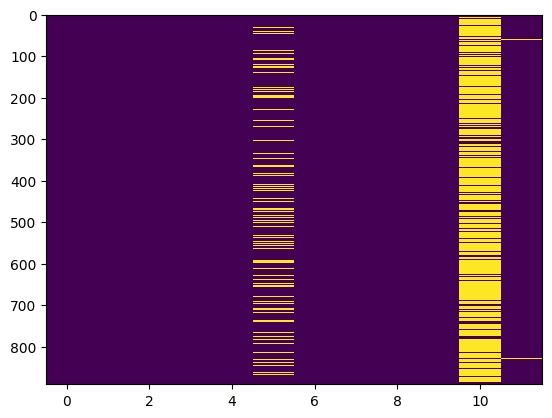

In [119]:
# Trực quan hóa dữ liệu thiếu bằng Heatmap
plt.imshow(df.isnull(), aspect='auto', cmap='viridis', interpolation='none')
    # plt.imshow(): Hàm từ thư viện Matplotlib, sử dụng để hiển thị một hình ảnh trên một biểu đồ
    # isnull(): Trả về True nếu giá trị trong data thiếu
    # aspect='auto': điều chỉnh tỷ lệ khung hình để khớp với khung hình của cửa sổ.
    # cmap='viridis': xác định bảng màu (colormap) được sử dụng để hiển thị heatmap
    # interpolation='none': 'none' -không sử dụng nội suy, mỗi điểm dữ liệu sẽ được hiển thị như một ô màu riêng biệt, không bị làm mờ hay trung bình.

In [120]:
# Nhận xét về tình trạng thiếu dữ liệu
print(f"Age: {df_missing['Age']} giá trị thiếu")
print(f"Cabin: {df_missing['Cabin']} giá trị thiếu")
print(f"Embarked: {df_missing['Embarked']} giá trị thiếu")

Age: 177 giá trị thiếu
Cabin: 687 giá trị thiếu
Embarked: 2 giá trị thiếu


3.  Xử lý tên cột tên Name, tách ra làm 2 cột: firstName và secondName. Lưu ý: Sau khi tách cột xong thì xóa luôn cột Name 

In [121]:
#Tách cột 'Name' thành 2 cột 'firstName' và 'secondName'
df[['firstName', 'secondName']] = df['Name'].str.split(',', expand=True)
    # split(expand=True): phương thức tách trên cột Name, có kí tự phân cách là dấu ','
    # expand=True: một dfframe mới được tạo ra từ việc tách chuỗi
    # df[['firstName','secondName']]: gán kết quả tách lần lượt vào 2 cột 

In [122]:
#Xóa cột Name khỏi df
df = df.drop('Name', axis=1) 
    #axis=1: Thao tác áp dụng cho các cột.
df.head(10) #In kết quả đã thay đổi

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,firstName,secondName
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss. Laina
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel)
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr. William Henry
5,6,0,3,male,NaN,0,0,330877,8.4583,NaN,Q,Moran,Mr. James
6,7,0,1,male,54.0,0,0,17463,51.8625,E46,S,McCarthy,Mr. Timothy J
7,8,0,3,male,2.0,3,1,349909,21.0750,NaN,S,Palsson,Master. Gosta Leonard
8,9,1,3,female,27.0,0,2,347742,11.1333,NaN,S,Johnson,Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9,10,1,2,female,14.0,1,0,237736,30.0708,NaN,C,Nasser,Mrs. Nicholas (Adele Achem)


4. Xử lý rút gọn kích thước dữ liệu trên cột Sex như sau: thay thế male -> M và female -> F

In [123]:
# Rút gọn kích thước dữ liệu trên cột Sex
df['Sex'] = df['Sex'].map({'male': 'M', 'female': 'F'})

In [124]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,firstName,secondName
0,1,0,3,M,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris
1,2,1,1,F,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,3,1,3,F,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss. Laina
3,4,1,1,F,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel)
4,5,0,3,M,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr. William Henry


5. Xử lý dữ liệu thiếu trên biến Age bằng cách thay thế bằng giá trị trung bình tuổi: Hãy đưa ra quyết định dùng giá trị trung bình tuổi toàn bộ hành khách hay theo từng nhóm hạng vé (hạng hành khách: Pclass).

a. Sử dụng Seaborn để vẽ biểu đồ (Box plot) trực quan dữ liệu để xác định phân phối tuổi trên từng hạng hành khách. Nhận xét về tuổi trung bình giữa các nhóm hành khách. Từ đó đưa ra quyết định cách thay thế giá trị tuổi bị thiếu

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

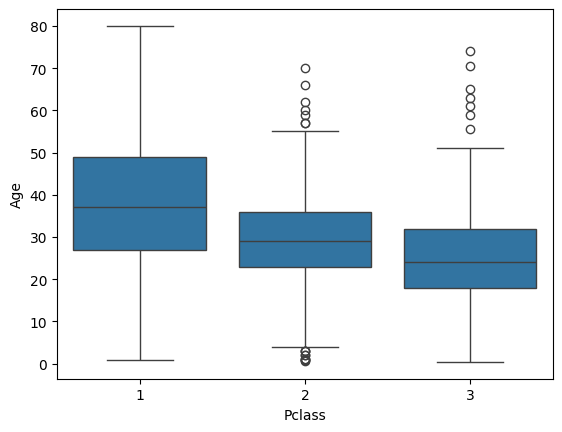

In [125]:
#Sử dụng Seaborn để vẽ biểu đồ Box plot
sns.boxplot(x='Pclass', y='Age', data=df)
    # sns.boxplot(): Hàm từ thư viện Seaborn, được sử dụng để tạo biểu đồ Box plot.

In [126]:
# Nhận xét về tuổi trung bình giữa các nhóm hành khách
age_means = df.groupby('Pclass')['Age'].mean()
 # df.groupby('Pclass'): Nhóm các hàng trong df theo các giá trị trong cột Pclass
 # Tính giá trị trung bình của cột Age trong mỗi nhóm đã được nhóm
print("\nTuổi trung bình theo từng hạng vé:")
print(age_means)


Tuổi trung bình theo từng hạng vé:
Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64


b. Tiến hành thay thế giá trị Age bị thiếu. Sau đó, hiển thị kết quả dạng bảng và trực quan dữ liệu đã xử lý thiếu cho cột‘Age‘ bằng biểu đồ Heat map

In [127]:
# Tiến hành thay thế giá trị Age bị thiếu bằng giá trị trung bình theo từng nhóm Pclass
def fill_age(row): #Nhận vào 1 hàng trong data
    if pd.isnull(row['Age']): #Xem xét giá trị có thiếu không
        return age_means[row['Pclass']] #Trả về giá trị trung bình của Age theo nhóm Pclass
    else:
        return row['Age'] # Trả về lại giá trị nêu không thiếu

In [128]:
df['Age'] = df.apply(fill_age, axis=1)
# Gọi hàm fill_age áp dụng vào cột Age

In [129]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,firstName,secondName
0,1,0,3,M,22.00000,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris
1,2,1,1,F,38.00000,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,3,1,3,F,26.00000,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss. Laina
3,4,1,1,F,35.00000,1,0,113803,53.1000,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel)
4,5,0,3,M,35.00000,0,0,373450,8.0500,NaN,S,Allen,Mr. William Henry
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,M,27.00000,0,0,211536,13.0000,NaN,S,Montvila,Rev. Juozas
887,888,1,1,F,19.00000,0,0,112053,30.0000,B42,S,Graham,Miss. Margaret Edith
888,889,0,3,F,25.14062,1,2,W./C. 6607,23.4500,NaN,S,Johnston,"Miss. Catherine Helen ""Carrie"""
889,890,1,1,M,26.00000,0,0,111369,30.0000,C148,C,Behr,Mr. Karl Howell


<AxesSubplot:>

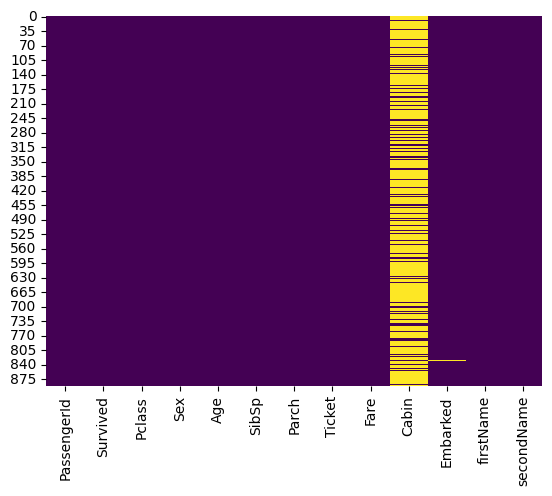

In [130]:
# Trực quan hóa dữ liệu thiếu sau khi xử lý cho cột Age bằng Heatmap
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')

6. Xây dựng biến số Agegroup có thang đo thứ tự được ánh xạ theo thang đo khoảng dựa trên độ tuổi của hành khách như sau: (age =< 12]: Kid; (12, 18]: Teen, (18, 60]: Adult và ( age > 60): Older

In [131]:
# Xây dựng biến số Agegroup
def categorize_age(age):
    if age <= 12:
        return 'Kid'
    elif 12 < age <= 18:
        return 'Teen'
    elif 18 < age <= 60:
        return 'Adult'
    else:
        return 'Older'

In [132]:
df['Agegroup'] = df['Age'].apply(categorize_age)
# Tạo hàm Agegroup baawngd cách áp dụng hàm categorize_age trên cột Age

In [133]:
# Hiển thị dữ liệu sau khi thêm biến Agegroup
df[['Age','Agegroup']].head(10)

,Age,Agegroup
0,22.00000,Adult
1,38.00000,Adult
2,26.00000,Adult
3,35.00000,Adult
4,35.00000,Adult
5,25.14062,Adult
6,54.00000,Adult
7,2.00000,Kid
8,27.00000,Adult
9,14.00000,Teen


7. Tiến hành thêm đặc trưng về danh xưng (namePrefix) trong xã hội bằng cách tách Mr, Mrs, Miss, Master ra khỏi "secondName"

In [134]:
# 7. Thêm đặc trưng về danh xưng (namePrefix) từ secondName
df['namePrefix'] = df['secondName'].str.split('.').str[0].str.strip()
# Tạo cột namePrefix bằng cách str.split('.') tách chuỗi trong cột secondName tại dấu chấm.
# str[0]: lấy phần đều tiên của kết quả tách chuỗi
# str.strip(): loại bỏ khoảng trắng thừa ở đầu và cuối chuỗi

In [135]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,firstName,secondName,Agegroup,namePrefix
0,1,0,3,M,22.00000,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris,Adult,Mr
1,2,1,1,F,38.00000,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer),Adult,Mrs
2,3,1,3,F,26.00000,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss. Laina,Adult,Miss
3,4,1,1,F,35.00000,1,0,113803,53.1000,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel),Adult,Mrs
4,5,0,3,M,35.00000,0,0,373450,8.0500,NaN,S,Allen,Mr. William Henry,Adult,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,M,27.00000,0,0,211536,13.0000,NaN,S,Montvila,Rev. Juozas,Adult,Rev
887,888,1,1,F,19.00000,0,0,112053,30.0000,B42,S,Graham,Miss. Margaret Edith,Adult,Miss
888,889,0,3,F,25.14062,1,2,W./C. 6607,23.4500,NaN,S,Johnston,"Miss. Catherine Helen ""Carrie""",Adult,Miss
889,890,1,1,M,26.00000,0,0,111369,30.0000,C148,C,Behr,Mr. Karl Howell,Adult,Mr


8. Khai thác thêm thông tin số lượng thành viên đi theo nhóm thân quen (familySize) đối với mỗi hành khách trên chuyến hải trình; family size = 1+ SibSp + Parc

In [136]:
df['familySize'] = 1 + df['SibSp'] + df['Parch']

# familySize:  cộng 1 (bao gồm cả hành khách đó) với số lượng anh 
# chị em/chồng/vợ (SibSp) và số lượng cha mẹ/con cái (Parc) đi cùng.

In [137]:
df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,firstName,secondName,Agegroup,namePrefix,familySize
0,1,0,3,M,22.00000,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris,Adult,Mr,2
1,2,1,1,F,38.00000,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer),Adult,Mrs,2
2,3,1,3,F,26.00000,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss. Laina,Adult,Miss,1
3,4,1,1,F,35.00000,1,0,113803,53.1000,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel),Adult,Mrs,2
4,5,0,3,M,35.00000,0,0,373450,8.0500,NaN,S,Allen,Mr. William Henry,Adult,Mr,1
5,6,0,3,M,25.14062,0,0,330877,8.4583,NaN,Q,Moran,Mr. James,Adult,Mr,1
6,7,0,1,M,54.00000,0,0,17463,51.8625,E46,S,McCarthy,Mr. Timothy J,Adult,Mr,1
7,8,0,3,M,2.00000,3,1,349909,21.0750,NaN,S,Palsson,Master. Gosta Leonard,Kid,Master,5
8,9,1,3,F,27.00000,0,2,347742,11.1333,NaN,S,Johnson,Mrs. Oscar W (Elisabeth Vilhelmina Berg),Adult,Mrs,3
9,10,1,2,F,14.00000,1,0,237736,30.0708,NaN,C,Nasser,Mrs. Nicholas (Adele Achem),Teen,Mrs,2


9. Tạo thêm đặc trưng "Alone" để xác định hành khách đi theo nhóm hay cá nhân bằng cách dựa trên familySize như sau: Nếu familySize = 0 thì giá trị Alone = 1 và ngược lại là 0.

In [138]:
# Tạo cột Alone dựa trên familySize
df['Alone'] = df.apply(lambda row: 1 if row['familySize'] == 1 else 0, axis=1)
    # Kiểm tra điều kiện row['familySize'] == 1 và trả về 1 nếu đúng và 0 nếu sai

In [139]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,firstName,secondName,Agegroup,namePrefix,familySize,Alone
0,1,0,3,M,22.00000,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris,Adult,Mr,2,0
1,2,1,1,F,38.00000,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer),Adult,Mrs,2,0
2,3,1,3,F,26.00000,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss. Laina,Adult,Miss,1,1
3,4,1,1,F,35.00000,1,0,113803,53.1000,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel),Adult,Mrs,2,0
4,5,0,3,M,35.00000,0,0,373450,8.0500,NaN,S,Allen,Mr. William Henry,Adult,Mr,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,M,27.00000,0,0,211536,13.0000,NaN,S,Montvila,Rev. Juozas,Adult,Rev,1,1
887,888,1,1,F,19.00000,0,0,112053,30.0000,B42,S,Graham,Miss. Margaret Edith,Adult,Miss,1,1
888,889,0,3,F,25.14062,1,2,W./C. 6607,23.4500,NaN,S,Johnston,"Miss. Catherine Helen ""Carrie""",Adult,Miss,4,0
889,890,1,1,M,26.00000,0,0,111369,30.0000,C148,C,Behr,Mr. Karl Howell,Adult,Mr,1,1


10. Tiến hành tách loại cabin (typeCabin) mà hành khách ở để lọc và phân tích đặc tính cabin. Loại cabin được kí hiệu bởi chữ cái đầu tiên. Lưu ý: Đối với dữ liệu cabin bị thiếu thì thay thế bằng "Unknown"

In [140]:
df['typeCabin'] = df['Cabin'].str[0].fillna('Unknown')
# Tạo cột typeCabin dựa trên ký tự đầu tiên của giá trị trong cột Cabin.
# fillna('Unknown'): thay thế bàng 'Unknow' nếu giá trị trong cột Cabin NaN

In [141]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,firstName,secondName,Agegroup,namePrefix,familySize,Alone,typeCabin
0,1,0,3,M,22.00000,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris,Adult,Mr,2,0,Unknown
1,2,1,1,F,38.00000,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer),Adult,Mrs,2,0,C
2,3,1,3,F,26.00000,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss. Laina,Adult,Miss,1,1,Unknown
3,4,1,1,F,35.00000,1,0,113803,53.1000,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel),Adult,Mrs,2,0,C
4,5,0,3,M,35.00000,0,0,373450,8.0500,NaN,S,Allen,Mr. William Henry,Adult,Mr,1,1,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,M,27.00000,0,0,211536,13.0000,NaN,S,Montvila,Rev. Juozas,Adult,Rev,1,1,Unknown
887,888,1,1,F,19.00000,0,0,112053,30.0000,B42,S,Graham,Miss. Margaret Edith,Adult,Miss,1,1,B
888,889,0,3,F,25.14062,1,2,W./C. 6607,23.4500,NaN,S,Johnston,"Miss. Catherine Helen ""Carrie""",Adult,Miss,4,0,Unknown
889,890,1,1,M,26.00000,0,0,111369,30.0000,C148,C,Behr,Mr. Karl Howell,Adult,Mr,1,1,C


# Phần 2: Khai thác thông tin hữu ích – EDA

12. Trực quan thông tin tương quan tỉ lệ sống sót và thiệt mạng trên từng nhóm giới tính.

Text(0.5, 0, 'Survived')

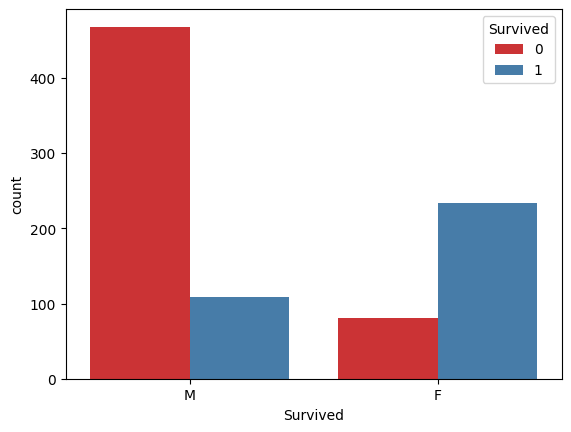

In [142]:
# Tạo biểu đồ bar với số lượng hành khách để so sánh số lượng và tỉ lệ sống sót
sns.countplot(x='Sex', hue='Survived', data=df, palette="Set1")
plt.xlabel('Survived')

13. Trực quan thông tin hành khách sống sót trên từng nhóm phân loại hành khách (Pclass).

<AxesSubplot:xlabel='Pclass', ylabel='count'>

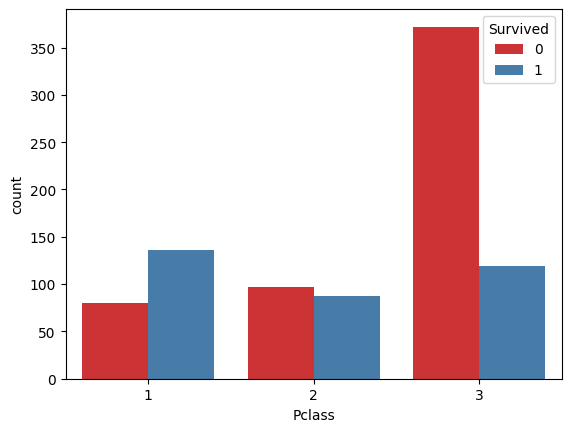

In [143]:
# Tạo biểu đồ cột để thể hiện số lượng hành khách sống sót trên từng nhóm Pclass
sns.countplot(x='Pclass', hue='Survived', data=df, palette="Set1")

14. Trực quan thông tin hành khách sống sót trên từng nhóm giới tính và thang đo tuổi tác

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 14.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 5.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 25.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 12.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg

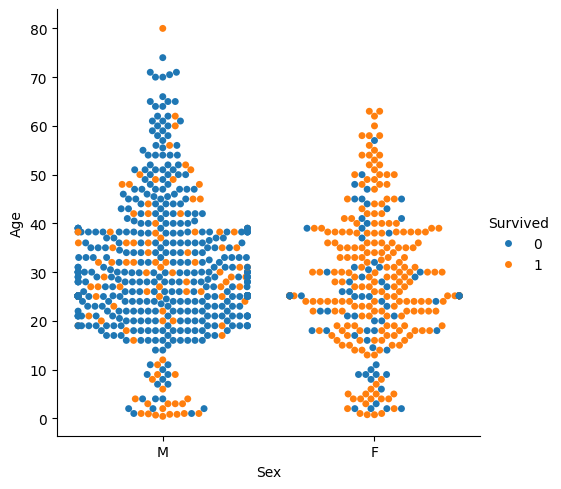

In [144]:
# Sử dụng sns.catplot với kind='swarm' để tạo biểu đồ
sns.catplot(x='Sex', y='Age', hue='Survived', kind='swarm', data=df)
# hue='Survived' chia màu các điểm dữ liệu dựa trên sống sót (Survived=1) hoặc không sống sót (Survived=0).

15. Trực quan xác suất hành khách sống sót dựa trên thông tin nhóm đi cùng

C:\Users\Admin\AppData\Local\Temp\ipykernel_6388\3045401161.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='familySize', y='Survived', data=df, ci=None)


<AxesSubplot:xlabel='familySize', ylabel='Survived'>

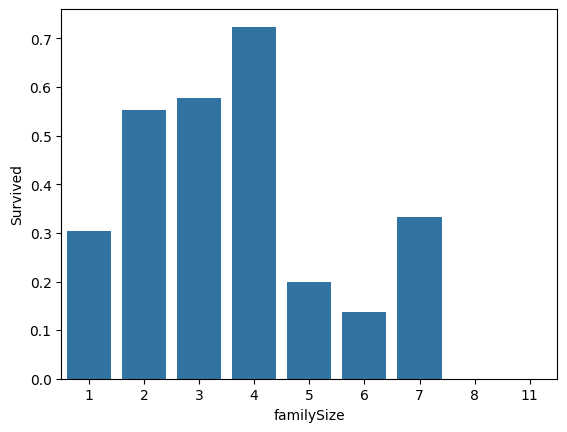

In [145]:
# Tạo biểu đồ bar plot để thể hiện xác suất sống sót dựa trên familySize
sns.barplot(x='familySize', y='Survived', data=df, ci=None)

16. Trực quan xác suất hành khách sống sót dựa trên thông tin giá vé

<AxesSubplot:xlabel='Fare', ylabel='Count'>

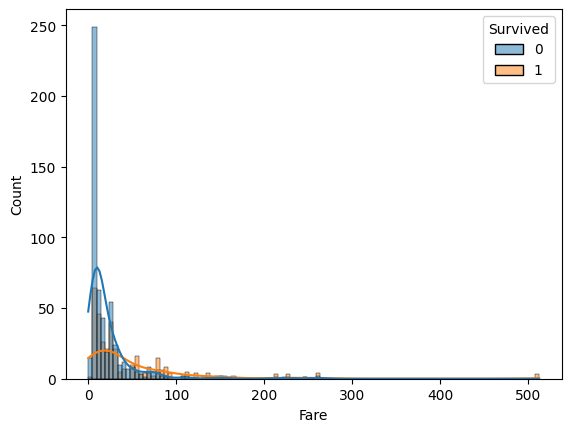

In [146]:
# Biểu đồ xác suất sống sót dựa trên thông tin giá vé
sns.histplot(x='Fare', hue='Survived', data=df, kde=True)
    # sns.histplot:  tạo biểu đồ histogram.
    # x='Fare' biểu thị cho trục x là giá vé.
    # hue='Survived' chia màu cho các cột dữ liệu dựa trên sống sót hay không.
    # kde=True để hiển thị đường cong ước tính mật độ xác suất.

17. Trực quan số lượng người thiệt mạng và sống sót theo phân lớp (Pclass) hành khách và cảng sẽ cập bến.

<AxesSubplot:xlabel='Pclass', ylabel='count'>

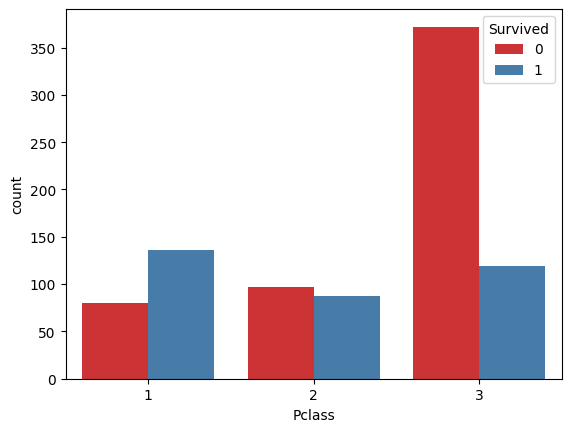

In [147]:
# Tạo biểu đồ stacked bar để so sánh số lượng người sống sót và thiệt mạng
sns.countplot(x='Pclass', hue='Survived', data=df, palette='Set1', hue_order=[0, 1])
    # sns.countplot: tạo biểu đồ stacked bar để so sánh số lượng người sống sót và thiệt mạng
    # Trục x (Pclass) biểu thị cho các nhóm phân lớp hành khách (1, 2, 3).
    # hue='Survived': số lượng người sống sót (Survived=1) và thiệt mạng (Survived=0).
    # palette='Set1' để chọn màu sắc cho các cột.
    # hue_order=[0, 1] để đảm bảo thứ tự hiển thị của chú thích (0 là Not Survived và 1 là Survived).